In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

2024-02-11 07:38:49.859529: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 07:38:49.859623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 07:38:49.988888: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [3]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [4]:
tr_df = train_df('/kaggle/input/handwritten-characters/Train')

In [5]:
tr_df

,Class Path,Class
0,/kaggle/input/handwritten-characters/Train/N/1...,N
1,/kaggle/input/handwritten-characters/Train/N/1...,N
2,/kaggle/input/handwritten-characters/Train/N/7...,N
3,/kaggle/input/handwritten-characters/Train/N/2...,N
4,/kaggle/input/handwritten-characters/Train/N/1...,N
...,...,...
834031,/kaggle/input/handwritten-characters/Train/J/9...,J
834032,/kaggle/input/handwritten-characters/Train/J/3...,J
834033,/kaggle/input/handwritten-characters/Train/J/5...,J
834034,/kaggle/input/handwritten-characters/Train/J/3...,J


In [6]:
ts_df = test_df('/kaggle/input/handwritten-characters/Validation')

In [7]:
ts_df

,Class Path,Class
0,/kaggle/input/handwritten-characters/Validatio...,N
1,/kaggle/input/handwritten-characters/Validatio...,N
2,/kaggle/input/handwritten-characters/Validatio...,N
3,/kaggle/input/handwritten-characters/Validatio...,N
4,/kaggle/input/handwritten-characters/Validatio...,N
...,...,...
22519,/kaggle/input/handwritten-characters/Validatio...,J
22520,/kaggle/input/handwritten-characters/Validatio...,J
22521,/kaggle/input/handwritten-characters/Validatio...,J
22522,/kaggle/input/handwritten-characters/Validatio...,J


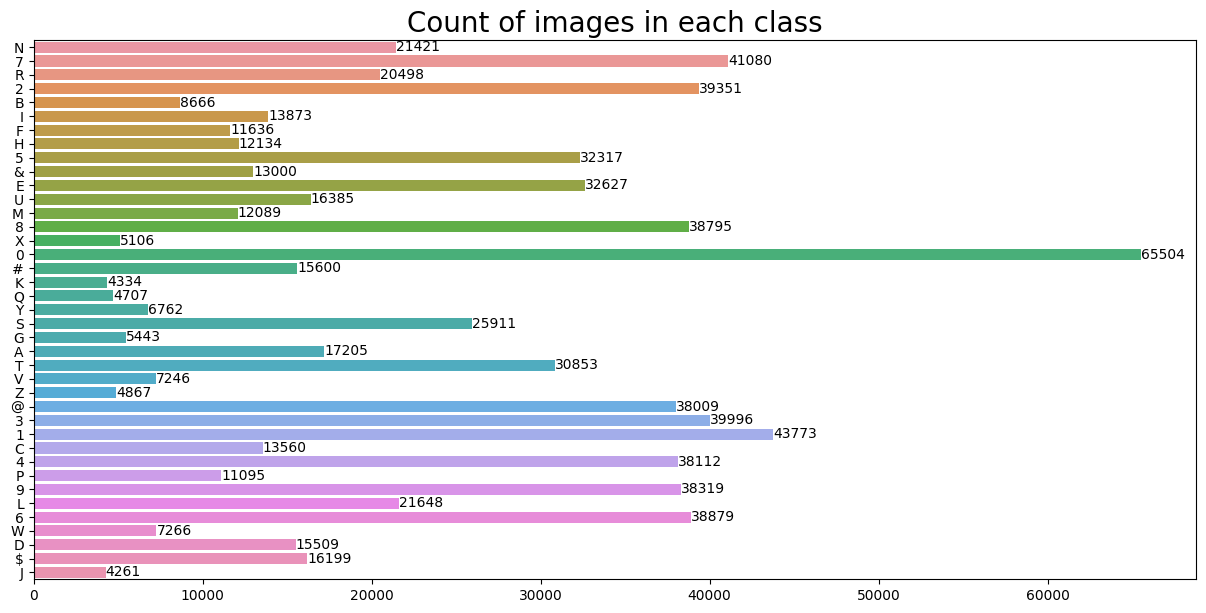

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

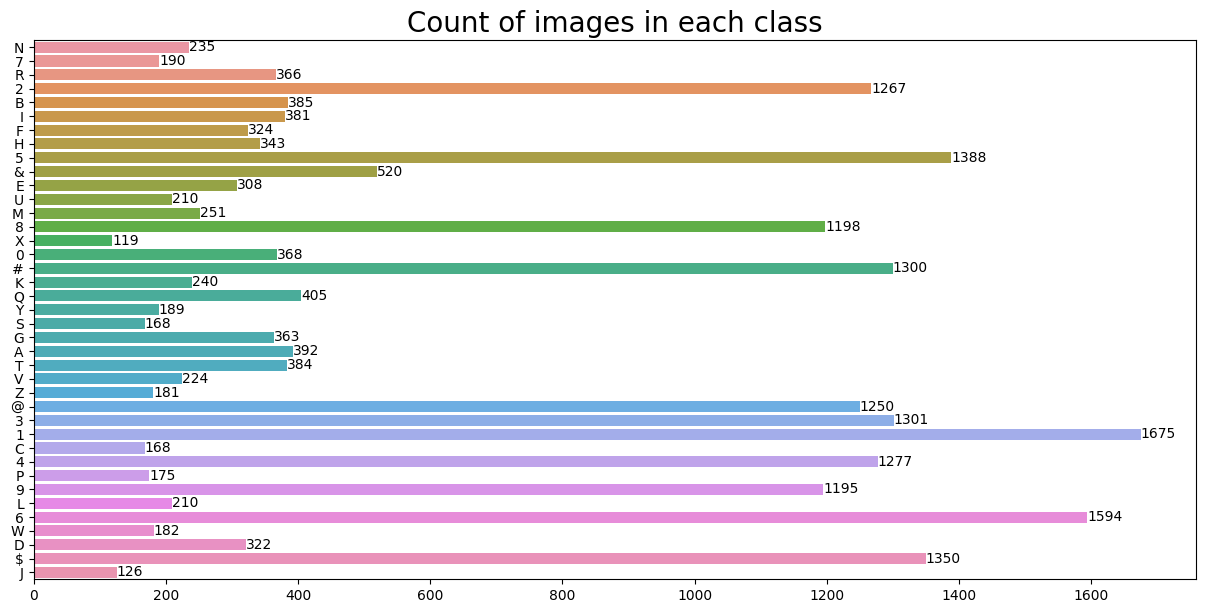

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
def train_df(tr_path):
    classes = []
    class_paths = []
    class_counts = {} 
    files = os.listdir(tr_path)
    
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        class_counts[file] = 0 
        
        for image in label:
            if class_counts[file] >= 4000:
                break 
            
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
            class_counts[file] += 1  
    
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [11]:
tr_df = train_df('/kaggle/input/handwritten-characters/Train')

In [12]:
tr_df

,Class Path,Class
0,/kaggle/input/handwritten-characters/Train/N/1...,N
1,/kaggle/input/handwritten-characters/Train/N/1...,N
2,/kaggle/input/handwritten-characters/Train/N/7...,N
3,/kaggle/input/handwritten-characters/Train/N/2...,N
4,/kaggle/input/handwritten-characters/Train/N/1...,N
...,...,...
155995,/kaggle/input/handwritten-characters/Train/J/2...,J
155996,/kaggle/input/handwritten-characters/Train/J/1...,J
155997,/kaggle/input/handwritten-characters/Train/J/3...,J
155998,/kaggle/input/handwritten-characters/Train/J/1...,J


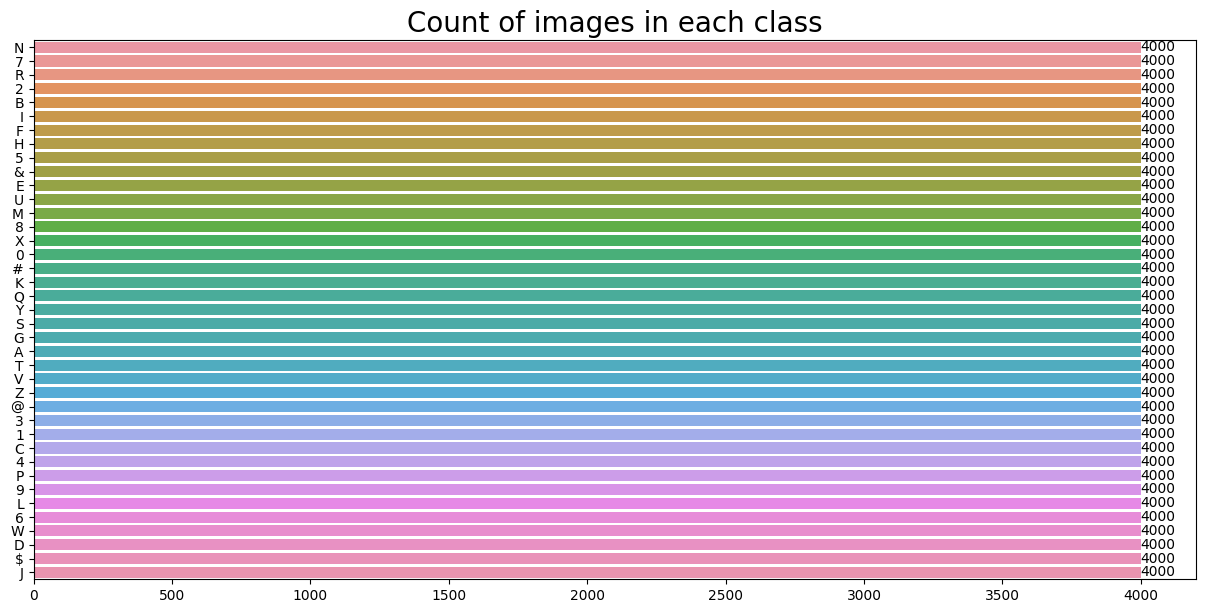

In [13]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [14]:
valid_df, ts_df = train_test_split(ts_df, train_size=.5, random_state=20)

In [15]:
valid_df

,Class Path,Class
14268,/kaggle/input/handwritten-characters/Validatio...,1
10014,/kaggle/input/handwritten-characters/Validatio...,S
758,/kaggle/input/handwritten-characters/Validatio...,R
13376,/kaggle/input/handwritten-characters/Validatio...,3
8821,/kaggle/input/handwritten-characters/Validatio...,#
...,...,...
22294,/kaggle/input/handwritten-characters/Validatio...,$
3915,/kaggle/input/handwritten-characters/Validatio...,5
14729,/kaggle/input/handwritten-characters/Validatio...,1
4367,/kaggle/input/handwritten-characters/Validatio...,5


In [16]:
batch_size = 16
img_size = (299,299)

tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

gen = ImageDataGenerator()


tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                 y_col='Class',batch_size=batch_size,
                                 target_size=img_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',batch_size=batch_size,
                                 target_size=img_size,shuffle=False)

Found 156000 validated image filenames belonging to 39 classes.
Found 11262 validated image filenames belonging to 39 classes.
Found 11262 validated image filenames belonging to 39 classes.


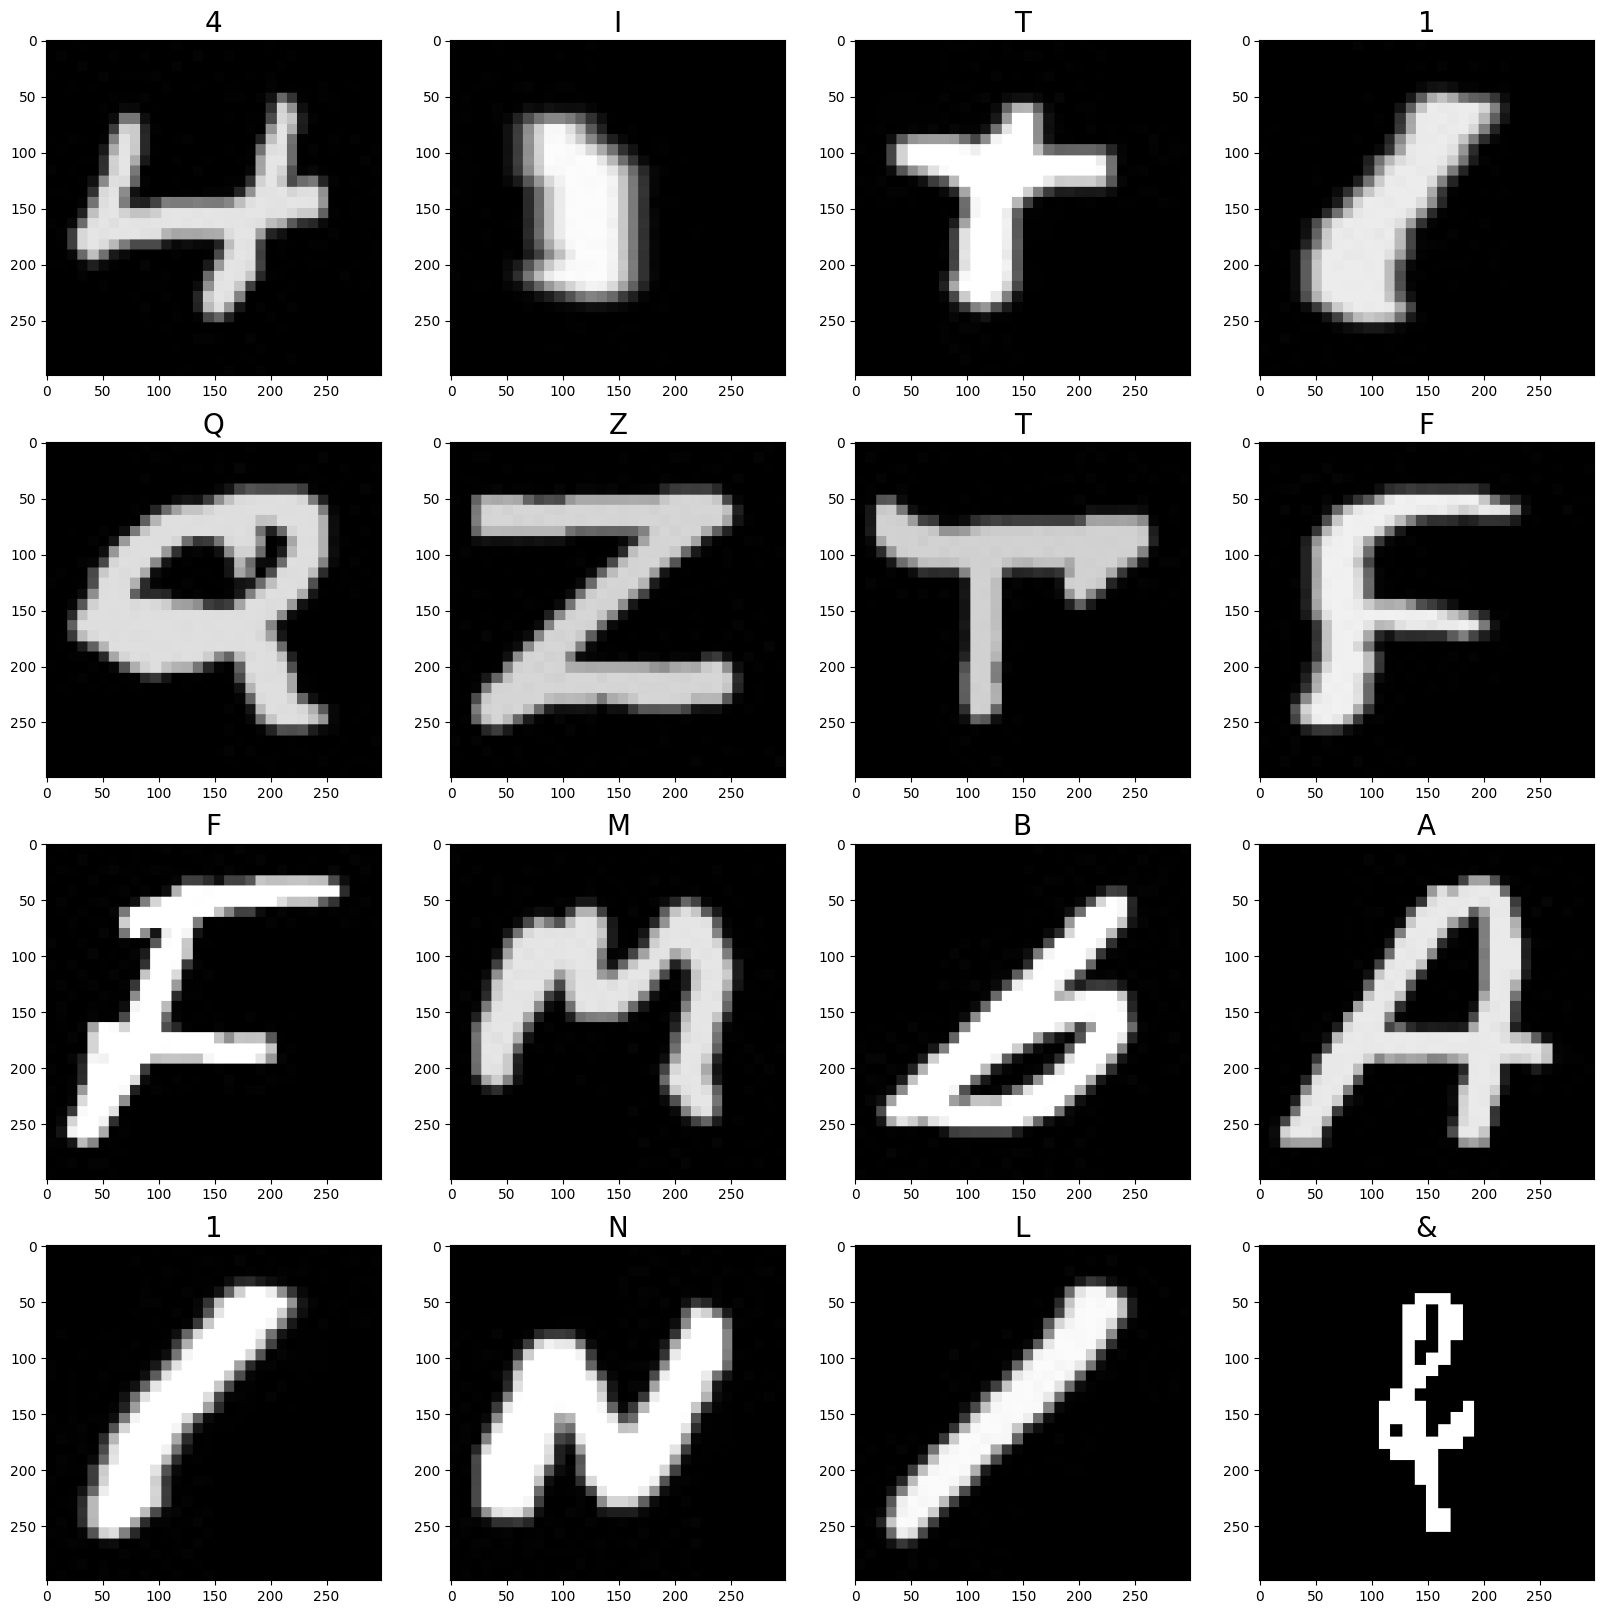

In [17]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='k', fontsize=20)
plt.show()

In [18]:
num_classes = len(classes)
num_classes

39

In [19]:
img_shape=(299,299,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(num_classes, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

83683744/83683744 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 39)                5031      
                                                         

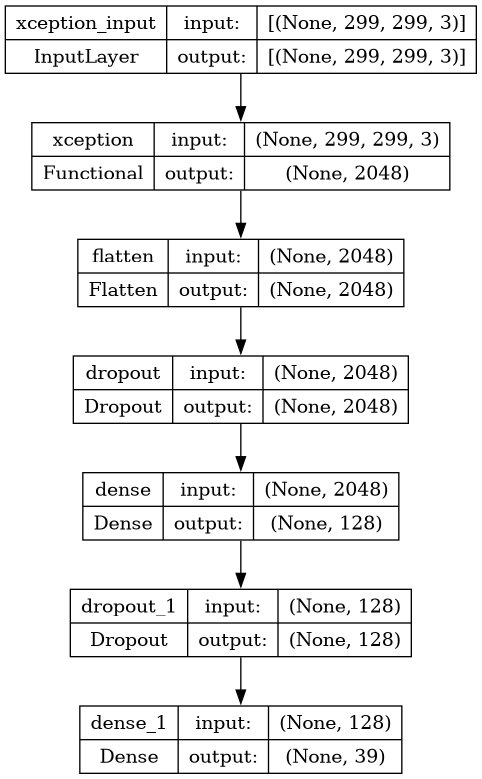

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [21]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
hist = model.fit(tr_gen,
                 epochs=6,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=es)

Epoch 1/6


I0000 00:00:1707637596.183493     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9750/9750 [==============================] - 2463s 250ms/step - loss: 0.3908 - accuracy: 0.8832 - val_loss: 0.2479 - val_accuracy: 0.9106
Epoch 2/6
9750/9750 [==============================] - 2435s 250ms/step - loss: 0.2129 - accuracy: 0.9302 - val_loss: 0.1716 - val_accuracy: 0.9450
Epoch 3/6
9750/9750 [==============================] - 2436s 250ms/step - loss: 0.1791 - accuracy: 0.9396 - val_loss: 0.1987 - val_accuracy: 0.9294
Epoch 4/6
9750/9750 [==============================] - 2434s 250ms/step - loss: 0.1598 - accuracy: 0.9457 - val_loss: 0.1475 - val_accuracy: 0.9558
Epoch 5/6
9750/9750 [==============================] - 2438s 250ms/step - loss: 0.1434 - accuracy: 0.9501 - val_loss: 0.1423 - val_accuracy: 0.9519
Epoch 6/6
9750/9750 [==============================] - 2434s 250ms/step - loss: 0.1284 - accuracy: 0.9544 - val_loss: 0.1568 - val_accuracy: 0.9475


In [22]:
model.evaluate(ts_gen, verbose=1)

704/704 [==============================] - 64s 91ms/step - loss: 0.1854 - accuracy: 0.9444


[0.18536780774593353, 0.9444148540496826]

In [23]:
model.save("handwritten_characters_Model.h5")

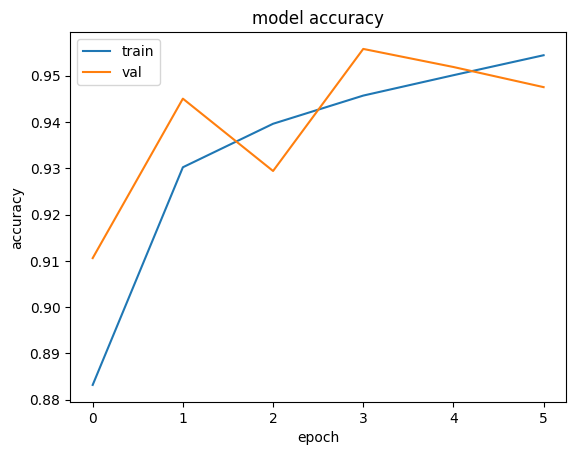

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

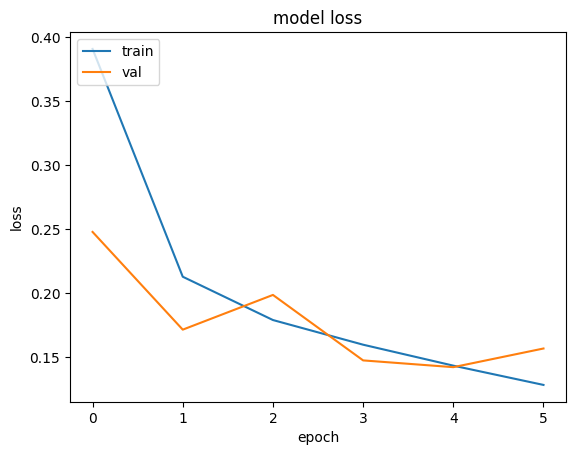

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
pred = model.predict(ts_gen)
pred = np.argmax(pred, axis=1)

labels = (tr_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

704/704 [==============================] - 49s 69ms/step


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = ts_df['Class']
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

           #       1.00      1.00      1.00       652
           $       1.00      1.00      1.00       650
           &       1.00      1.00      1.00       241
           0       0.94      0.98      0.96       185
           1       0.97      0.77      0.86       832
           2       0.98      0.97      0.98       648
           3       1.00      1.00      1.00       681
           4       1.00      0.98      0.99       633
           5       1.00      0.95      0.97       722
           6       0.98      0.98      0.98       814
           7       0.93      0.98      0.96       102
           8       1.00      0.99      0.99       588
           9       0.92      0.92      0.92       584
           @       1.00      1.00      1.00       639
           A       0.89      0.98      0.94       195
           B       0.96      0.93      0.94       198
           C       0.83      0.83      0.83        88
           D       0.99    

In [32]:
classes=list(tr_gen.class_indices.keys())
print (classes)

['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


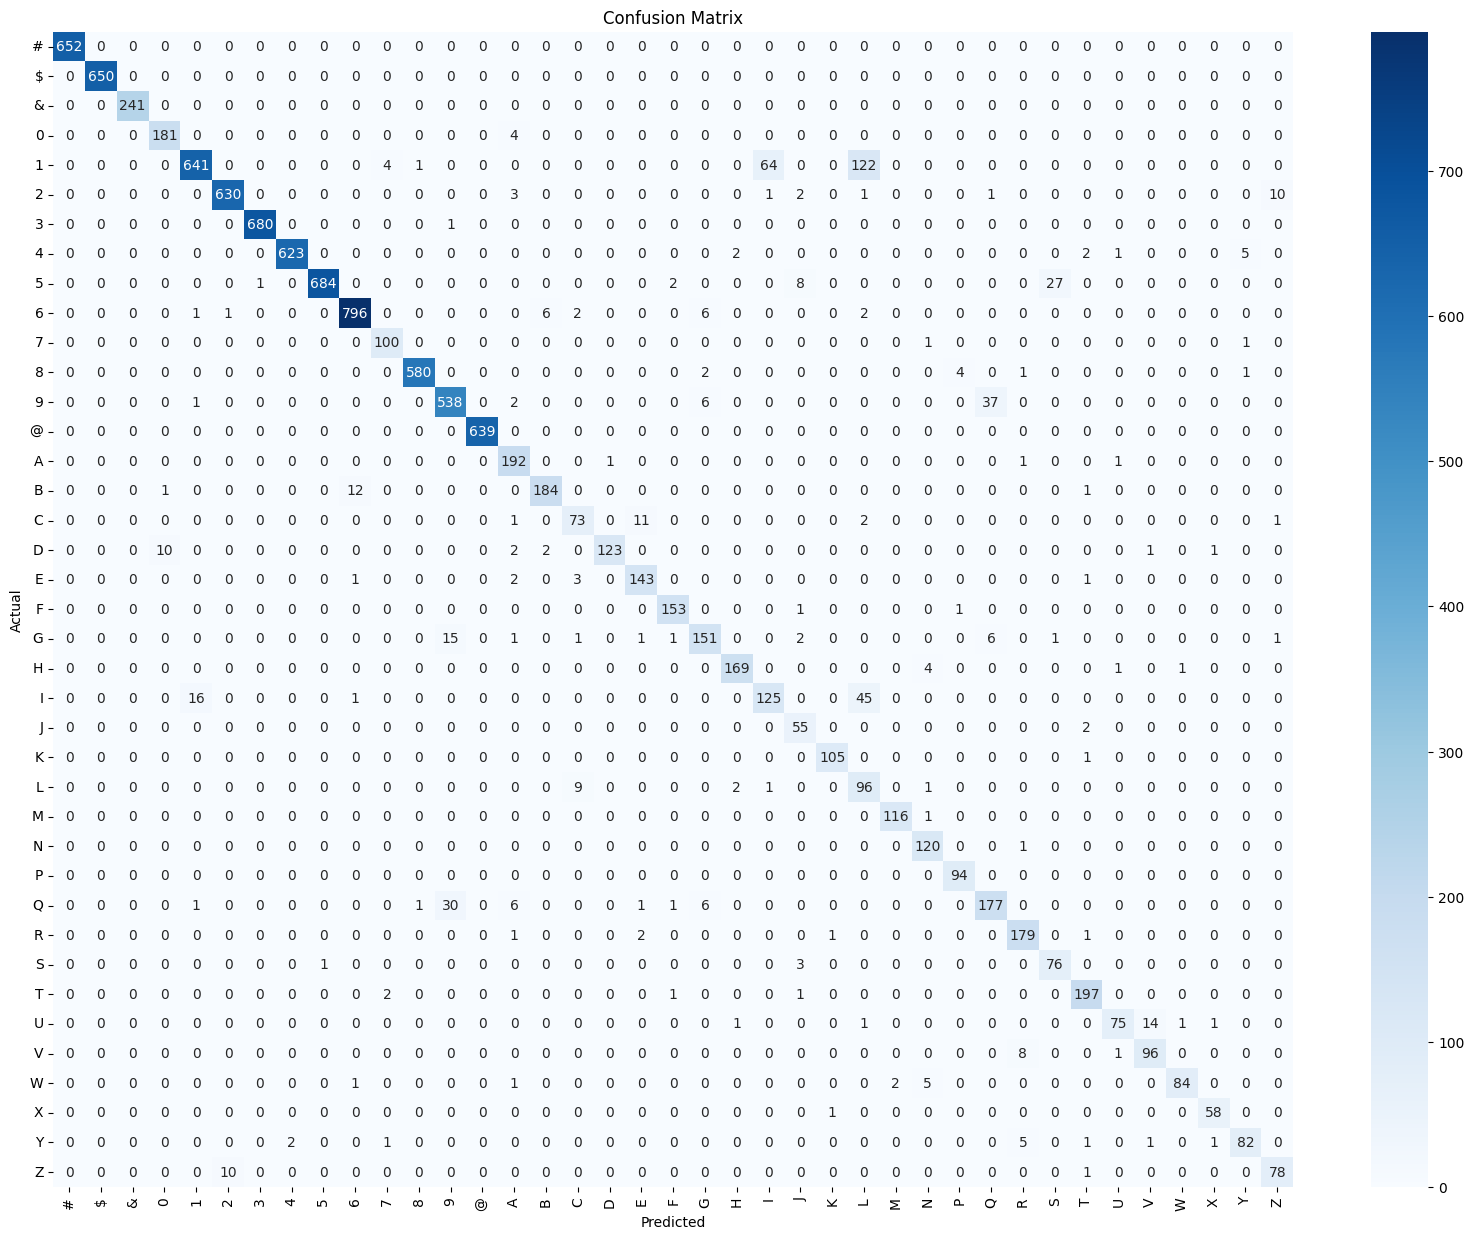

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = ts_df['Class'].values  # Replace 'Class' with the actual column name containing the true labels
cm = confusion_matrix(y_true, pred2)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

num_classes = len(class_labels)

plt.xticks(ticks=[i + 0.5 for i in range(num_classes)], labels=class_labels, rotation=90)
plt.yticks(ticks=[i + 0.5 for i in range(num_classes)], labels=class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()


In [67]:
import numpy as np
from tensorflow.keras.preprocessing import image
def predict_single_image(model, img_path, img_size=(299, 299)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predictions = model.predict(img_array)   
    return predictions

In [71]:
predictions = predict_single_image(model, '/kaggle/input/handwritten-characters/Validation/F/106.jpg')
predicted_class_index = np.argmax(predictions)
predicted_class_name = classes[predicted_class_index]
print("Predicted class name:", predicted_class_name)

1/1 [==============================] - 0s 21ms/step
Predicted class name: F
